In [1]:
#import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

import os
%matplotlib notebook

In [2]:
#set working directory
os.chdir('C:/Users/siree/OneDrive/Desktop/WGU/D209/D209_Files')

In [3]:
#getting working directory
cwd = os.getcwd()
print(cwd)

C:\Users\siree\OneDrive\Desktop\WGU\D209\D209_Files


In [4]:
#load the dataset
df = pd.read_csv('churn_clean.csv')

In [5]:
#### C3: prepare the data ######

In [6]:
#make categories for MonthlyCharge
def categorize_monthly_charge(charge):
    if charge < 100:
        return 0
    elif 100 <= charge < 200:
        return 1
    else:
        return 2

df['MonthlyChargeCategory'] = df['MonthlyCharge'].apply(categorize_monthly_charge)

In [7]:
#Impute missing values
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    df[column].fillna(df[column].median(), inplace=True)

In [8]:
#Impute numerical features
for column in df.select_dtypes(include=['object']).columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [9]:
#Define binary categorical variables and encode them as 0 and 1
binary_categorical_vars = ['Churn', 'Techie', 'Port_modem', 'Tablet', 'Phone', 'Multiple', 
                           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                           'StreamingTV', 'StreamingMovies', 'PaperlessBilling']

for column in binary_categorical_vars:
    df[column] = df[column].map({'Yes': 1, 'No': 0})

In [10]:
#One-hot encode non-binary categorical variables
non_binary_categorical_vars = ['Area', 'Marital', 'Gender', 'Contract', 'InternetService', 'PaymentMethod']
df = pd.get_dummies(df, columns=non_binary_categorical_vars)

In [11]:
#One-hot encode the relevant categorical variables
df = pd.get_dummies(df, columns=binary_categorical_vars)

In [12]:
#drop irrelevant columns
irrelevant_columns = ['CaseOrder','Job','Customer_id', 'Interaction', 'UID', 'Email', 'City', 'State', 'County', 'Lat', 'Lng', 'Zip', 'TimeZone', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8']
columns_to_drop = [col for col in irrelevant_columns if col in df.columns]
df.drop(columns=columns_to_drop, inplace=True)

In [13]:
#Ensure the remaining columns are numeric and relevant
X = df.drop(columns=['MonthlyCharge','MonthlyChargeCategory'])
y = df['MonthlyChargeCategory']

In [14]:
numeric_vars = X.select_dtypes(include=['float64', 'int64']).columns
numeric_vars

Index(['Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek',
       'Contacts', 'Yearly_equip_failure', 'Tenure', 'Bandwidth_GB_Year'],
      dtype='object')

In [15]:
#Standardize numeric variables
scaler = StandardScaler()
X[numeric_vars] = scaler.fit_transform(X[numeric_vars])

In [16]:
#Combine the features and target variable back into a single DataFrame
cleaned_data = pd.concat([X, y], axis=1)

In [17]:
##### C4: CSV OF DATA SET #######

In [18]:
#CSV file
cleaned_data.to_csv('C:/Users/siree/OneDrive/Desktop/WGU/D209/TASK_1/SIREEN_SHABAN_D209_TASK1_clean_data.csv')

In [19]:
###### D1: Split the data ########

In [20]:
#Select features and target variable
X = df.drop(columns=['MonthlyCharge', 'MonthlyChargeCategory'])
y = df['MonthlyChargeCategory']

In [21]:
#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
#Combine the split data for saving
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

In [23]:
#CSV files
train_data.to_csv('C:/Users/siree/OneDrive/Desktop/WGU/D209/TASK_1/SIREEN_SHABAN_D209_TASK1_train_data.csv', index=False)
test_data.to_csv('C:/Users/siree/OneDrive/Desktop/WGU/D209/TASK_1/SIREEN_SHABAN_D209_TASK1_test_data.csv', index=False)

In [24]:
##### D2: OUTPUT AND CALCULATIONS #######

In [25]:
#Ensure X_train and X_test are DataFrames
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [26]:
#Ensure X_train and X_test are contiguous arrays with correct data type
X_train = np.ascontiguousarray(X_train, dtype=np.float64)
X_test = np.ascontiguousarray(X_test, dtype=np.float64)

In [27]:
#Verify the data types and memory layout
print("X_train is contiguous:", X_train.flags.c_contiguous)
print("X_test is contiguous:", X_test.flags.c_contiguous)
print("X_train dtype:", X_train.dtype)
print("X_test dtype:", X_test.dtype)

X_train is contiguous: True
X_test is contiguous: True
X_train dtype: float64
X_test dtype: float64


In [28]:
#Initialize and train KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [29]:
#Predict on test data
y_pred = knn.predict(X_test)

In [30]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[   0   64    7]
 [   6 1856  270]
 [   2  674  121]]


In [31]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        71
           1       0.72      0.87      0.79      2132
           2       0.30      0.15      0.20       797

    accuracy                           0.66      3000
   macro avg       0.34      0.34      0.33      3000
weighted avg       0.59      0.66      0.61      3000



In [32]:
##### E1: ACCURACY AND AUC ######

In [33]:
n_classes = len(np.unique(y_test))

In [34]:
#Binarize the output labels
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])
y_pred_binarized = label_binarize(y_pred, classes=[0, 1, 2])

In [35]:
#Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_binarized[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [36]:
#Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_pred_binarized.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [37]:
# Aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

In [38]:
# Interpolate all ROC curves at these points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

In [39]:
# Average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

In [40]:
# Print Macro-Averaged AUC
print(f"Macro-Averaged AUC: {roc_auc['macro']:.2f}")

Macro-Averaged AUC: 0.51


<IPython.core.display.Javascript object>


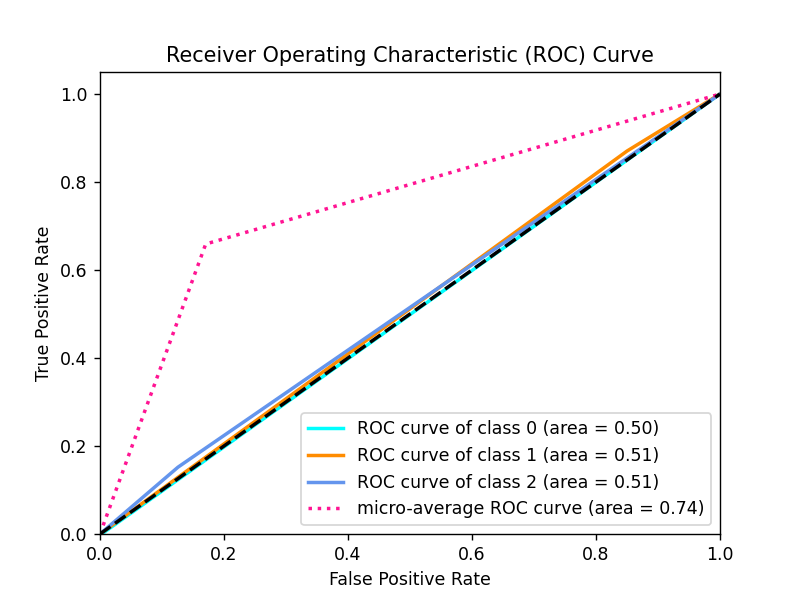

In [41]:
#Plot ROC curve for each class and micro-average ROC curve
plt.figure()
colors = ['aqua', 'darkorange', 'cornflowerblue']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {i} (area = {roc_auc[i]:0.2f})')

plt.plot(fpr["micro"], tpr["micro"], color='deeppink', linestyle=':', linewidth=2,
         label=f'micro-average ROC curve (area = {roc_auc["micro"]:0.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()